In [4]:
print(pl.__version__)

0.19.13


In [1]:
import pandas as pd
import polars as pl
import numpy as np

# data_path = r"C:\Users\LIUH0\Documents\mfe courses\quarter3\MachineLearning431\hw1\StockRetAcct_insample.dta"
data_path = r"C:\workspace\ext\cygwin\home\2013956\personal\machine_learning\hw1\StockRetAcct_insample.dta"
df = pd.read_stata(data_path)
df["ExRet"] = np.exp(df["lnAnnRet"]) - np.exp(df["lnRf"])
dl = pl.from_dataframe(df)
dl 

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64
6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.3564
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097
6.0,1982,0.18663,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.065553
6.0,1983,0.489819,0.08983,0.00017,-0.07178,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.538032
10.0,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0,-0.461433
12.0,2000,-1.356847,0.061977,0.000012,0.165238,0.251746,12.275754,-0.382327,-0.023783,-0.174606,0.824471,-0.591773,1.067196,-3.815523,6.0,-0.806467
15.0,1986,0.453034,0.062209,0.000136,null,null,12.740419,0.219266,null,null,0.779327,0.118562,null,null,3.0,0.508892
15.0,1987,-0.049553,0.066003,0.000183,null,0.337218,13.172914,0.219979,0.104938,0.046007,0.522232,0.127679,0.05877,-0.362636,3.0,-0.116576
15.0,1988,0.141739,0.072406,0.000193,0.160109,0.10825,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.077184


AttributeError: PathCollection.set() got an unexpected keyword argument 'size'

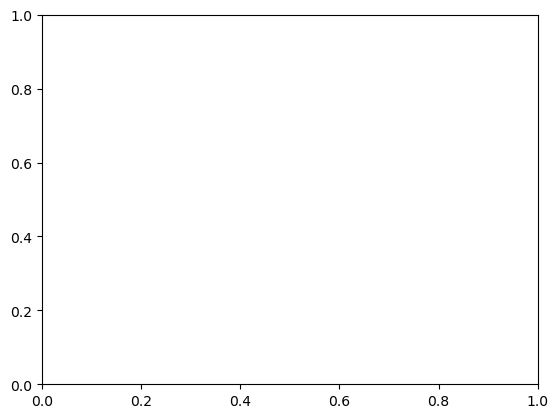

In [27]:
ew_bm_mutualfunds = dl.drop_nulls("lnBM").with_columns(pl.col("lnBM").qcut(20, labels=[str(i) for i in range(1, 21)]).alias("qcut")).select(pl.col("ExRet"), pl.col("qcut").cast(pl.Utf8).cast(pl.Int16)).group_by("qcut").mean().sort("qcut")
ew_bm_mutualfunds
plt.scatter(ew_bm_mutualfunds.get_column("qcut").to_numpy(), ew_bm_mutualfunds.get_column("ExRet").to_numpy())
plt.show()

In [3]:
result_dl = None
for i in range(1981, 2015):
    temp_dl = dl.filter(pl.col("year") == i).drop_nulls("lnBM").with_columns(pl.col("lnBM").qcut(20, labels=[str(i) for i in range(1, 21)]).alias("qcut"))
    temp_dl = temp_dl.cast({"qcut": pl.Utf8})
    if result_dl is None:
        result_dl = temp_dl
    else:
        result_dl = pl.concat([result_dl, temp_dl])
result_dl

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet,qcut
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,str
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097,"""17"""
50.0,1981,-0.362215,0.130199,0.000093,-0.037263,0.339044,11.667311,0.243628,0.146766,0.183164,0.79037,0.147756,0.150796,0.084959,3.0,-0.442922,"""14"""
120.0,1981,0.37296,0.130199,0.00054,0.300219,0.036303,13.427506,0.193899,0.200025,0.071841,0.970597,0.106679,0.044003,0.708901,8.0,0.312971,"""20"""
128.0,1981,-0.519226,0.130199,0.00144,0.168267,0.139604,14.407578,0.461742,0.149542,0.075114,0.831918,0.152359,0.085585,0.139065,4.0,-0.544074,"""15"""
135.0,1981,-0.768397,0.130199,0.000272,0.040192,0.104784,12.740149,0.20317,0.101146,0.024861,0.766497,0.066962,0.058133,0.795631,3.0,-0.675299,"""20"""
143.0,1981,-0.924644,0.130199,0.002769,0.243197,0.223243,15.061482,0.235058,0.168626,0.292767,0.769143,0.200616,0.126681,-0.303511,12.0,-0.742383,"""10"""
199.0,1981,0.076814,0.130199,0.001824,0.032098,0.061914,14.643783,0.288466,0.176307,0.07864,0.776593,0.233056,0.037514,-0.178874,1.0,-0.059214,"""11"""
206.0,1981,0.279154,0.130199,0.000686,0.046836,0.157236,13.665726,0.296064,0.176503,0.101794,0.481521,0.173882,0.083304,0.061986,7.0,0.182956,"""14"""
214.0,1981,-0.233593,0.130199,0.000617,-0.028694,0.437863,13.559172,0.140418,0.136242,0.050734,0.844184,0.069905,0.056126,0.487077,3.0,-0.347371,"""18"""


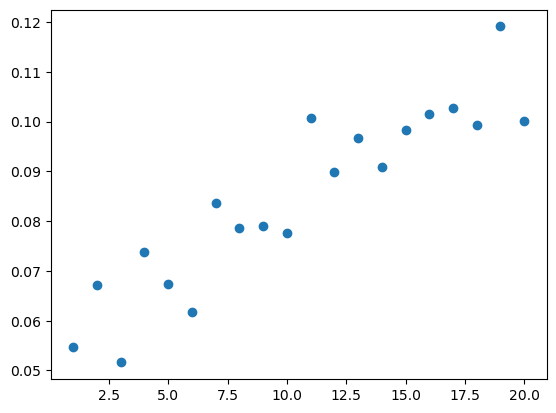

In [29]:
dl_vingtile_yr = result_dl.group_by(by=["year", "qcut"]).agg(pl.col("ExRet").mean())
dl_vingtile_yr
ew_bm_mutualfunds_yr = dl_vingtile_yr.group_by("qcut").agg(pl.col("ExRet").mean()).cast({"qcut": pl.Int16}).sort("qcut")

ew_bm_mutualfunds_yr
# import matplotlib.pyplot as plt
plt.scatter(ew_bm_mutualfunds_yr.get_column("qcut").to_numpy(), ew_bm_mutualfunds_yr.get_column("ExRet").to_numpy())
plt.show()

In [22]:
# dl = dl.with_columns((np.exp(pl.col("lnAnnRet")) - np.exp(pl.col("lnRf"))).alias("ExRet"))
dl.columns
dl.select(["lnRf", "lnProf"]).to_numpy()

array([[ 7.89442805e-02,  2.01767072e-01],
       [ 1.30199024e-01,  2.15660885e-01],
       [ 1.30702587e-01,  1.84087485e-01],
       ...,
       [ 2.08345500e-03, -1.26431298e+00],
       [ 1.55270464e-03, -1.16386342e+00],
       [ 1.17493285e-03,  3.60688381e-02]])

In [30]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

start_year = 1980
end_year = 2014
length = end_year - start_year + 1
port_return = np.empty([length, 13])
exdog = ["lnBM", "lnProf", "ff_ind"]

for i in range(start_year, end_year + 1):
    # x = dl.filter(pl.col("year") == i).select(exdog).to_numpy()
    # y = dl.filter(pl.col("year") == i).get_column("ExRet").to_numpy()
    # model = sm.OLS(y, sm.add_constant(x), missing="drop")
    model = smf.ols("ExRet ~ lnBM + lnProf + C(ff_ind)", df.loc[df["year"] == i, ["lnBM", "lnProf", "ExRet", "ff_ind"]])
    result = model.fit()
    params = result.params
    port_return[i - start_year] = params[1:]

port_return

array([[ 9.29500649e-02,  5.23749260e-02, -1.11442459e-01,
        -3.72068582e-02,  1.67886348e-01,  1.63636001e-01,
        -2.78115606e-01,  8.57451976e-02,  1.31615037e-01,
         5.68343984e-03,  2.82024953e-02,  1.02027254e-02,
         4.50663768e-01],
       [-6.51879080e-02, -2.82007359e-01, -3.23137897e-01,
        -1.72820621e-01, -1.82425988e-01,  1.02581899e-02,
         6.00868833e-02,  7.98195019e-04,  3.89160323e-02,
        -1.17806761e-01, -1.95819598e-01,  9.55822378e-02,
         3.54965066e-01],
       [ 1.84187660e-01, -3.63205140e-02, -4.26997801e-01,
        -2.60204510e-02,  3.77719616e-01,  7.77132064e-02,
        -3.90448442e-01,  3.89237188e-01,  1.22573035e-01,
         4.09182220e-02,  8.64155167e-02, -2.00562688e-02,
        -2.06007359e-01],
       [-1.67210266e-01, -8.88657390e-02, -1.54511796e-01,
        -9.06392367e-02, -1.74471342e-01, -5.04890487e-02,
        -5.52510250e-02, -6.70065828e-02, -1.55756821e-01,
        -7.36133898e-02, -1.50772617e

In [31]:
result_dict = {}
result_dict["mean"] = port_return.mean(axis=0)
result_dict["std"] = port_return.std(axis=0)
result_dict["sharpe"] = result_dict["mean"] / result_dict["std"]
result_dict["tstats"] = np.sqrt(length) * result_dict["sharpe"]
print(result_dict)

{'mean': array([-0.00987953, -0.01461959, -0.03185612,  0.00319085,  0.00958403,
        0.01969787, -0.02408892,  0.00513473,  0.05039092,  0.00606633,
       -0.02306044,  0.02346245,  0.12050509]), 'std': array([0.11650407, 0.12517072, 0.28870088, 0.09854894, 0.25555433,
       0.19353292, 0.15495716, 0.09054735, 0.16157616, 0.11101313,
       0.08529959, 0.06617963, 0.18757186]), 'sharpe': array([-0.08479985, -0.11679722, -0.11034301,  0.03237835,  0.03750291,
        0.10178047, -0.15545536,  0.0567077 ,  0.311871  ,  0.05464515,
       -0.27034638,  0.35452673,  0.64244757]), 'tstats': array([-0.50168265, -0.69098165, -0.65279802,  0.19155292,  0.22187023,
        0.60214137, -0.91968629,  0.33548728,  1.84505369,  0.32328504,
       -1.59939076,  2.09740844,  3.8007711 ])}


In [32]:
dl 

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64
6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.3564
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097
6.0,1982,0.18663,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.065553
6.0,1983,0.489819,0.08983,0.00017,-0.07178,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.538032
10.0,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0,-0.461433
12.0,2000,-1.356847,0.061977,0.000012,0.165238,0.251746,12.275754,-0.382327,-0.023783,-0.174606,0.824471,-0.591773,1.067196,-3.815523,6.0,-0.806467
15.0,1986,0.453034,0.062209,0.000136,null,null,12.740419,0.219266,null,null,0.779327,0.118562,null,null,3.0,0.508892
15.0,1987,-0.049553,0.066003,0.000183,null,0.337218,13.172914,0.219979,0.104938,0.046007,0.522232,0.127679,0.05877,-0.362636,3.0,-0.116576
15.0,1988,0.141739,0.072406,0.000193,0.160109,0.10825,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.077184


In [43]:
last_date = dl.filter(pl.col("year") == 2014).drop_nulls(["lnProf", "lnBM", "ff_ind"]).with_columns(intercept=1).cast({"ff_ind": pl.Int16}).to_dummies("ff_ind")
last_date
columns = ["intercept", "lnProf", "lnBM"] + [f"ff_ind_{i}" for i in range(1, 12)]
columns
xmat = last_date.select(columns).to_numpy()
xmat
portweights_lnBM = np.matmul(np.matmul(xmat.T, xmat), xmat.T)[2, :]
portweights_lnBM = portweights_lnBM * 0.15 / result_dict["std"][-1]
portweights_lnBM

array([ -4478.20910327,  -3691.14145938,  -3047.02086692, ...,
        -5056.23224591,  -8515.15303305, -11050.29800141])

[0.02286174 0.21895695 0.17243258 0.43687718 0.61727212 0.53646664
 0.66114894 0.83754399 1.01415961 0.80761065 0.8015742  0.91187631
 1.01104971 1.18947439 1.21278731 0.94709755 1.16947368 1.24028742
 1.04787126 0.81415113 1.10353893 1.24507089 1.18088508 1.34280024
 1.47101857 1.49390905 1.59925484 1.41455419 1.42698536 1.59388219
 1.48497961 1.38195686 1.51981679 1.53714887 1.44339142]


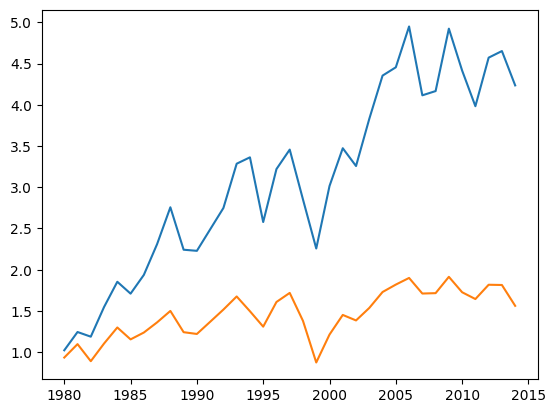

In [51]:
import matplotlib.pyplot as plt 

lnBM_ret = port_return[:, -2] * 0.15 / result_dict["std"][-2]
cum_ret_lnBM = np.empty(length)
cum_ret_lnBM[0] = np.log(lnBM_ret[0] + 1) 
for i in range(1, length):
    cum_ret_lnBM[i] = cum_ret_lnBM[i - 1] + np.log(1 + lnBM_ret[i])

print(cum_ret_lnBM)
old_port_ret = np.empty(length)
for i in range(start_year, end_year + 1):
    x = sm.add_constant(dl.filter(pl.col("year") == i).get_column("lnBM").to_numpy())
    y = dl.filter(pl.col("year") == i).get_column("ExRet").to_numpy()
    model = sm.OLS(y, x, missing="drop")
    result = model.fit()
    old_port_ret[i - start_year] = result.params[1]

lnBM_old_ret = old_port_ret * 0.15 / np.std(old_port_ret)
cum_ret_oldlnBM = np.empty(length)
cum_ret_oldlnBM[0] = np.log(1 + lnBM_old_ret[0])
for i in range(1, length):
    cum_ret_oldlnBM[i] = cum_ret_oldlnBM[i - 1] + np.log(1 + lnBM_old_ret[i])

plt.plot(range(start_year, end_year + 1), np.exp(cum_ret_lnBM))
plt.plot(range(start_year, end_year + 1), np.exp(cum_ret_oldlnBM))
plt.show()

In [ ]:
df_lead_roe = dl.set_sorted(["FirmID", "year"]).with_columns((pl.col("lnROE").shift(-1).over("FirmID")).alias("lead_lnROE")).drop_nulls(["lnROE", "lead_lnROE"]).to_pandas()
model = smf.ols("lead_lnROE ~ lnROE", df_lead_roe)
result = model.fit()
result.summary()

In [75]:
roe_panel2 = smf.ols("lead_lnROE ~ lnROE", df_lead_roe)
result2 = roe_panel2.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe[["FirmID"]]})
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lead_lnROE   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     1250.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          3.83e-251
Time:                        21:15:33   Log-Likelihood:                 11160.
No. Observations:               60473   AIC:                        -2.232e+04
Df Residuals:                   60471   BIC:                        -2.230e+04
Df Model:                           1                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0408      0.002     19.646      0.000       0.037       0.045
lnROE          0.5224      0.015     35.359      0.000       0.493       0.551
==============================================================================
Omnibus:                    56764.417   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7576440.104
Skew:                          -4.134   Prob(JB):                         0.00
Kurtosis:                      57.208   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [76]:
roe_panel3 = smf.ols("lead_lnROE ~ lnROE", df_lead_roe)
result3 = roe_panel3.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe[["FirmID", "year"]]})
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lead_lnROE   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     258.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           3.61e-17
Time:                        21:15:55   Log-Likelihood:                 11160.
No. Observations:               60473   AIC:                        -2.232e+04
Df Residuals:                   60471   BIC:                        -2.230e+04
Df Model:                           1                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0408      0.006      6.992      0.000       0.029       0.052
lnROE          0.5224      0.033     16.072      0.000       0.459       0.586
==============================================================================
Omnibus:                    56764.417   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7576440.104
Skew:                          -4.134   Prob(JB):                         0.00
Kurtosis:                      57.208   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [68]:
df_lead_roe_dummy = dl.set_sorted(["FirmID", "year"]).with_columns((pl.col("lnROE").shift(-1).over("FirmID")).alias("lead_lnROE"), intercept = 1).drop_nulls(["lnROE", "lead_lnROE", "ff_ind"]).cast({"ff_ind": pl.Int16}).to_dummies("ff_ind").to_pandas()

In [108]:
df_lead_roe_dummy
dl 

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64
6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.3564
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097
6.0,1982,0.18663,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.065553
6.0,1983,0.489819,0.08983,0.00017,-0.07178,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.538032
10.0,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0,-0.461433
12.0,2000,-1.356847,0.061977,0.000012,0.165238,0.251746,12.275754,-0.382327,-0.023783,-0.174606,0.824471,-0.591773,1.067196,-3.815523,6.0,-0.806467
15.0,1986,0.453034,0.062209,0.000136,null,null,12.740419,0.219266,null,null,0.779327,0.118562,null,null,3.0,0.508892
15.0,1987,-0.049553,0.066003,0.000183,null,0.337218,13.172914,0.219979,0.104938,0.046007,0.522232,0.127679,0.05877,-0.362636,3.0,-0.116576
15.0,1988,0.141739,0.072406,0.000193,0.160109,0.10825,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.077184


In [78]:
ff_ind = "+".join([f"ff_ind_{i}" for i in range(1, 12)])
regressors = "lead_lnROE ~ lnROE + " + ff_ind
print(regressors)
roe_panel4 = smf.ols(regressors, df_lead_roe_dummy)
result4 = roe_panel4.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe_dummy[["FirmID", "year"]]})
result4.summary()

lead_lnROE ~ lnROE + ff_ind_1+ff_ind_2+ff_ind_3+ff_ind_4+ff_ind_5+ff_ind_6+ff_ind_7+ff_ind_8+ff_ind_9+ff_ind_10+ff_ind_11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lead_lnROE   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     66.27
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.54e-19
Time:                        21:17:14   Log-Likelihood:                 11529.
No. Observations:               60467   AIC:                        -2.303e+04
Df Residuals:                   60454   BIC:                        -2.291e+04
Df Model:                          12                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0412      0.007      5.821      0.000       0.027       0.055
lnROE          0.5046      0.032     15.965      0.000       0.443       0.567
ff_ind_1       0.0256      0.005      5.044      0.000       0.016       0.036
ff_ind_2       0.0076      0.006      1.256      0.209      -0.004       0.019
ff_ind_3       0.0087      0.006      1.496      0.135      -0.003       0.020
ff_ind_4      -0.0135      0.009     -1.511      0.131      -0.031       0.004
ff_ind_5       0.0276      0.007      3.814      0.000       0.013       0.042
ff_ind_6      -0.0134      0.007     -1.838      0.066      -0.028       0.001
ff_ind_7      -0.0830      0.020     -4.142      0.000      -0.122      -0.044
ff_ind_8      -0.0043      0.006     -0.746      0.456      -0.016       0.007
ff_ind_9       0.0190      0.005      4.174      0.000       0.010       0.028
ff_ind_10     -0.0379      0.010     -3.890      0.000      -0.057      -0.019
ff_ind_11      0.0184      0.005      3.563      0.000       0.008       0.029
==============================================================================
Omnibus:                    56344.127   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7434296.468
Skew:                          -4.085   Prob(JB):                         0.00
Kurtosis:                      56.703   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [116]:
# pd.get_dummies(df_lead_roe_dummy["year"], prefix="year_").astype(int)
df_lead_roe_dummy1 = pd.concat([df_lead_roe_dummy, pd.get_dummies(df_lead_roe_dummy["year"], prefix="year").astype(int)], axis=1)
df_lead_roe_dummy1

,FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,...,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013
0,6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,...,0,0,0,0,0,0,0,0,0,0
1,6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,...,0,0,0,0,0,0,0,0,0,0
2,6.0,1982,0.186630,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1986,0.453034,0.062209,0.000136,NaN,NaN,12.740419,0.219266,NaN,...,0,0,0,0,0,0,0,0,0,0
4,15.0,1987,-0.049553,0.066003,0.000183,NaN,0.337218,13.172914,0.219979,0.104938,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60462,20308.0,2012,0.565036,0.002083,0.000154,1.412289,-0.111057,14.697495,0.725857,0.058956,...,0,0,0,0,0,0,0,0,1,0
60463,20308.0,2013,0.077438,0.001553,0.000222,0.506999,0.356750,15.224147,0.731743,0.059418,...,0,0,0,0,0,0,0,0,0,1
60464,20314.0,2011,0.071530,0.001880,0.000193,NaN,0.269093,14.923732,-0.891749,-0.063006,...,0,0,0,0,0,0,0,1,0,0
60465,20314.0,2012,1.232889,0.002083,0.000210,0.215003,-0.080371,15.008085,-1.264313,-0.089005,...,0,0,0,0,0,0,0,0,1,0


In [117]:
# df_lead_roe_dummy1 = pd.get_dummies(df_lead_roe_dummy, columns=["year"])
year_columns = [f"year_{i}" for i in range(start_year + 1, end_year)]
# df_lead_roe_dummy1[year_columns] = df_lead_roe_dummy1[year_columns].astype(int)

In [118]:
regressors1 = "lead_lnROE ~ lnROE + " + ff_ind + "+" + "+".join(year_columns)
print(regressors1)
roe_panel5 = smf.ols(regressors1, df_lead_roe_dummy1)
result5 = roe_panel5.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe_dummy1[["FirmID", "year"]]})
result5.summary()

lead_lnROE ~ lnROE + ff_ind_1+ff_ind_2+ff_ind_3+ff_ind_4+ff_ind_5+ff_ind_6+ff_ind_7+ff_ind_8+ff_ind_9+ff_ind_10+ff_ind_11+year_1981+year_1982+year_1983+year_1984+year_1985+year_1986+year_1987+year_1988+year_1989+year_1990+year_1991+year_1992+year_1993+year_1994+year_1995+year_1996+year_1997+year_1998+year_1999+year_2000+year_2001+year_2002+year_2003+year_2004+year_2005+year_2006+year_2007+year_2008+year_2009+year_2010+year_2011+year_2012+year_2013


c:\Users\LIUH0\anaconda3\envs\scientificProject\lib\site-packages\statsmodels\regression\linear_model.py:1883: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lead_lnROE   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     293.8
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.65e-33
Time:                        20:11:01   Log-Likelihood:                 11888.
No. Observations:               60467   AIC:                        -2.368e+04
Df Residuals:                   60421   BIC:                        -2.327e+04
Df Model:                          45                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0610      0.007      9.221      0.000       0.048       0.074
lnROE          0.5036      0.032     15.681      0.000       0.441       0.567
ff_ind_1       0.0254      0.005      5.123      0.000       0.016       0.035
ff_ind_2       0.0069      0.006      1.119      0.263      -0.005       0.019
ff_ind_3       0.0084      0.006      1.456      0.145      -0.003       0.020
ff_ind_4      -0.0142      0.009     -1.595      0.111      -0.032       0.003
ff_ind_5       0.0271      0.007      3.850      0.000       0.013       0.041
ff_ind_6      -0.0125      0.007     -1.783      0.075      -0.026       0.001
ff_ind_7      -0.0824      0.020     -4.099      0.000      -0.122      -0.043
ff_ind_8      -0.0049      0.006     -0.876      0.381      -0.016       0.006
ff_ind_9       0.0195      0.005      4.275      0.000       0.011       0.029
ff_ind_10     -0.0363      0.010     -3.599      0.000      -0.056      -0.017
ff_ind_11      0.0189      0.005      3.616      0.000       0.009       0.029
year_1981     -0.0022        nan        nan        nan         nan         nan
year_1982     -0.0260        nan        nan        nan         nan         nan
year_1983     -0.0152      0.001    -10.357      0.000      -0.018      -0.012
year_1984     -0.0009      0.002     -0.556      0.578      -0.004       0.002
year_1985     -0.0252      0.001    -26.652      0.000      -0.027      -0.023
year_1986     -0.0217      0.002    -13.574      0.000      -0.025      -0.019
year_1987     -0.0063      0.002     -3.305      0.001      -0.010      -0.003
year_1988      0.0133      0.002      6.721      0.000       0.009       0.017
year_1989     -0.0124      0.001    -12.095      0.000      -0.014      -0.010
year_1990     -0.0292      0.001    -22.102      0.000      -0.032      -0.027
year_1991     -0.0516      0.002    -26.213      0.000      -0.055      -0.048
year_1992     -0.0320      0.003    -10.968      0.000      -0.038      -0.026
year_1993     -0.0245      0.003     -8.455      0.000      -0.030      -0.019
year_1994     -0.0059      0.003     -2.076      0.038      -0.011      -0.000
year_1995     -0.0083      0.002     -3.619      0.000      -0.013      -0.004
year_1996     -0.0310      0.002    -13.541      0.000      -0.036      -0.027
year_1997     -0.0448      0.002    -27.741      0.000      -0.048      -0.042
year_1998     -0.0373      0.003    -14.004      0.000      -0.043      -0.032
year_1999     -0.0195      0.004     -4.341      0.000      -0.028      -0.011
year_2000     -0.0130      0.005     -2.858      0.004      -0.022      -0.004
year_2001     -0.0755      0.003    -25.346      0.000      -0.081      -0.070
year_2002     -0.0492      0.004    -12.306      0.000      -0.057      -0.041
year_2003     -0.0074      0.004     -1.792      0.073      -0.016       0.001
ye

In [120]:
df_lead_roe_dummy3 = df_lead_roe_dummy.dropna(subset=["lead_lnROE", "lnROE", "lnBM", "lnProf", "lnLever", "lnIssue", "lnInv"])
regressors2 = "lead_lnROE ~ lnROE + lnBM + lnProf + lnLever + lnIssue + lnInv + " + ff_ind 
print(regressors2)
roe_panel6 = smf.ols(regressors2, df_lead_roe_dummy3)
result6 = roe_panel6.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe_dummy3[["FirmID", "year"]]})
result6.summary()

lead_lnROE ~ lnROE + lnBM + lnProf + lnLever + lnIssue + lnInv + ff_ind_1+ff_ind_2+ff_ind_3+ff_ind_4+ff_ind_5+ff_ind_6+ff_ind_7+ff_ind_8+ff_ind_9+ff_ind_10+ff_ind_11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lead_lnROE   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     118.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.30e-24
Time:                        20:15:43   Log-Likelihood:                 18342.
No. Observations:               55040   AIC:                        -3.665e+04
Df Residuals:                   55022   BIC:                        -3.649e+04
Df Model:                          17                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0128      0.009     -1.408      0.159      -0.031       0.005
lnROE          0.3621      0.023     16.054      0.000       0.318       0.406
lnBM          -0.0535      0.006     -9.305      0.000      -0.065      -0.042
lnProf         0.2295      0.030      7.721      0.000       0.171       0.288
lnLever       -0.0100      0.005     -2.133      0.033      -0.019      -0.001
lnIssue       -0.0623      0.008     -7.773      0.000      -0.078      -0.047
lnInv         -0.0559      0.014     -3.935      0.000      -0.084      -0.028
ff_ind_1       0.0104      0.005      2.306      0.021       0.002       0.019
ff_ind_2       0.0024      0.006      0.378      0.706      -0.010       0.015
ff_ind_3       0.0104      0.006      1.786      0.074      -0.001       0.022
ff_ind_4      -0.0041      0.009     -0.483      0.629      -0.021       0.013
ff_ind_5       0.0079      0.006      1.266      0.205      -0.004       0.020
ff_ind_6      -0.0267      0.007     -3.885      0.000      -0.040      -0.013
ff_ind_7      -0.0533      0.013     -4.031      0.000      -0.079      -0.027
ff_ind_8       0.0421      0.007      6.058      0.000       0.028       0.056
ff_ind_9       0.0049      0.004      1.185      0.236      -0.003       0.013
ff_ind_10     -0.0353      0.008     -4.253      0.000      -0.052      -0.019
ff_ind_11      0.0492      0.008      6.542      0.000       0.034       0.064
==============================================================================
Omnibus:                    57636.518   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10390582.844
Skew:                          -4.907   Prob(JB):                         0.00
Kurtosis:                      69.592   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [121]:
df_lead_roe_dummy4 = dl.set_sorted(["FirmID", "year"]).with_columns((pl.col("lnROE").shift(-5).over("FirmID")).alias("lead5_lnROE"), intercept = 1).drop_nulls(["lead5_lnROE", "lnROE", "lnBM", "lnProf", "lnLever", "lnIssue", "lnInv", "ff_ind"]).cast({"ff_ind": pl.Int16}).to_dummies("ff_ind").to_pandas()
regressors3 = "lead5_lnROE ~ lnROE + lnBM + lnProf + lnLever + lnIssue + lnInv + " + ff_ind 
print(regressors3)
roe_panel7 = smf.ols(regressors3, df_lead_roe_dummy4)
result7 = roe_panel7.fit(cov_type="cluster", cov_kwds={"groups": df_lead_roe_dummy4[["FirmID", "year"]]})
result7.summary()

lead5_lnROE ~ lnROE + lnBM + lnProf + lnLever + lnIssue + lnInv + ff_ind_1+ff_ind_2+ff_ind_3+ff_ind_4+ff_ind_5+ff_ind_6+ff_ind_7+ff_ind_8+ff_ind_9+ff_ind_10+ff_ind_11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            lead5_lnROE   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     25.51
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           5.50e-13
Time:                        20:22:05   Log-Likelihood:                 8355.3
No. Observations:               36235   AIC:                        -1.667e+04
Df Residuals:                   36217   BIC:                        -1.652e+04
Df Model:                          17                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0368      0.010      3.552      0.000       0.017       0.057
lnROE          0.0681      0.020      3.430      0.001       0.029       0.107
lnBM          -0.0252      0.005     -5.332      0.000      -0.034      -0.016
lnProf         0.1681      0.035      4.786      0.000       0.099       0.237
lnLever        0.0019      0.004      0.459      0.646      -0.006       0.010
lnIssue       -0.0796      0.010     -7.922      0.000      -0.099      -0.060
lnInv         -0.0526      0.010     -5.381      0.000      -0.072      -0.033
ff_ind_1       0.0374      0.008      4.902      0.000       0.022       0.052
ff_ind_2       0.0146      0.011      1.345      0.179      -0.007       0.036
ff_ind_3       0.0163      0.008      2.049      0.040       0.001       0.032
ff_ind_4      -0.0088      0.014     -0.639      0.523      -0.036       0.018
ff_ind_5       0.0308      0.010      3.098      0.002       0.011       0.050
ff_ind_6      -0.0106      0.010     -1.088      0.277      -0.030       0.009
ff_ind_7      -0.0633      0.021     -3.051      0.002      -0.104      -0.023
ff_ind_8       0.0120      0.008      1.498      0.134      -0.004       0.028
ff_ind_9       0.0268      0.006      4.257      0.000       0.014       0.039
ff_ind_10      0.0031      0.013      0.248      0.804      -0.022       0.028
ff_ind_11      0.0337      0.009      3.915      0.000       0.017       0.051
==============================================================================
Omnibus:                    34806.983   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4445053.865
Skew:                          -4.319   Prob(JB):                         0.00
Kurtosis:                      56.568   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""